MM 1: Exercise 1
A random variable X is binomially distributed with mean 22 and variance 17.16. Find P(X ≥ 15).

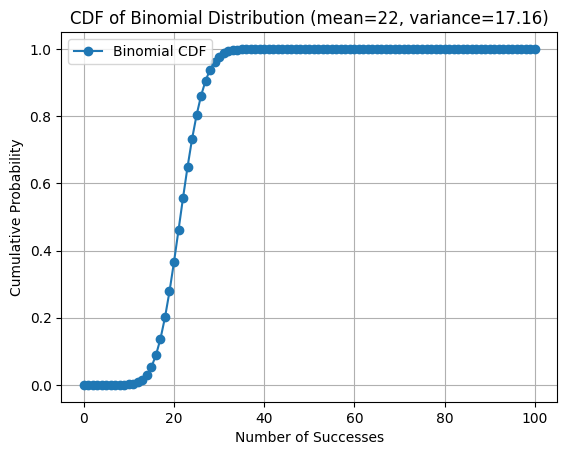

P(X ≥ 15) = 0.969547088727553


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters for mean and variance
mean = 22
variance = 17.16

# Calculate the number of trials and probability of success
n = mean**2 / (mean - variance)
p = 1 - variance / mean

# Create an array of x values
x = np.arange(0, int(n)+1)

# Calculate the CDF for each x value
cdf = binom.cdf(x, n, p)

# Find P(X ≥ 15)
p_greater_than_or_equal_to_15 = 1 - binom.cdf(14, n, p)

# Plot the CDF
plt.plot(x, cdf, marker='o', linestyle='-', label='Binomial CDF')

# Add labels and title to the plot
plt.xlabel('Number of Successes')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Binomial Distribution (mean={}, variance={})'.format(mean, variance))

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

print("P(X ≥ 15) =", p_greater_than_or_equal_to_15)



MM 1: Exercise 2
The average particulate concentration, in micrograms per cubic meter, was measured in a petrochemical complex at 36 randomly chosen times, with the following concentrations resulting:  
            5, 18, 15, 7, 23, 220, 130, 85, 103, 25, 80, 7, 24, 6, 13, 65, 37, 25,  
            24, 65, 82, 95, 77, 15, 70, 110, 44, 28, 33, 81, 29, 14, 45, 92, 17, 53
1) Represent the data in a histogram.
2) Find the sample mean, median and mode.
3) Is the histogram approximately normal?


Mean: 51.72222222222222
median: 35.0
mode: ModeResult(mode=array([7]), count=array([2]))
c) No it is not normal distributed


C:\Users\annac\AppData\Local\Temp\ipykernel_20864\3847380616.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = st.mode(data) #Nummeret der opstår flest gange


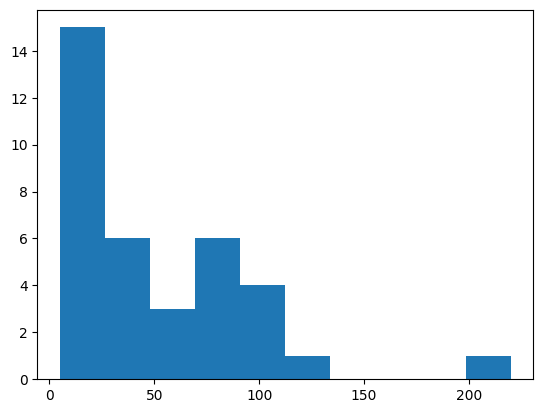

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

data = [5, 18, 15, 7, 23, 220, 130, 85, 103, 25, 80, 7, 24, 6, 13, 65, 37, 25, 24, 65, 82, 95, 77, 15, 70, 110, 44, 28, 33, 81, 29, 14, 45, 92, 17, 53]
#a)
plt.hist(data)
#b)
mu = np.mean(data)
print("Mean:", mu)
median = np.median(data)
print("median:", median)
mode = st.mode(data) #Nummeret der opstår flest gange
print("mode:", mode)
#c)
print("c) No it is not normal distributed")


MM 1: Exercise 3
It is known that disks produced by a certain company will be defective with probability 0.01
independently of each other. The company sells the disks in packages of 10 and offers a moneyback guarantee that at most 1 of the 10 disks is defective. What proportion of packages is
returned? If someone buys three packages, what is the probability that exactly one of them will
be returned?

In [27]:
# using the poisson r.v. in python
from scipy.stats import poisson


lambda_val = 10 * 1/100  # Mean of the Poisson distribution (λ = np)  # Mean of the Poisson distribution (λ = np)

# Calculate the probability using the survival function (1 - cumulative distribution function)

probability = 1 - poisson.cdf(1, lambda_val)  # P(X >= 5) = 1 - P(X <= 4)

print(f"The probability of having 1 or more errors in 1 packet is: {probability:.4f}")

import numpy as np

def bayes_formula(prior_prob, likelihood, evidence):
    # Convert lists to numpy arrays for element-wise multiplication
    prior_prob = np.array(prior_prob)
    likelihood = np.array(likelihood)
    
    # Calculate the probability using Bayes' formula
    numerator = likelihood * prior_prob
    denominator = np.sum(likelihood * prior_prob)
    posterior_prob = numerator / denominator
    return posterior_prob

# Example usage
prior_prob = [probability, 1-probability] # Prior probabilities P(A)
likelihood = [0.8, 0.2]  # Likelihoods P(B | A)
evidence = 0.4  # Evidence P(B)

posterior_prob = bayes_formula(prior_prob, likelihood, evidence)
print("Posterior Probability:", posterior_prob)


The probability of having 1 or more errors in 1 packet is: 0.0047
1.0242704107579739e-07


MM 2: Exercise 1  
Suppose that X is a discrete random variable with the following probability mass function:  
X 0 1 2 3  
P(X) 2θ/3 θ/3 2(1 − θ)/3 (1 − θ)/3  
where 0 ≤ θ ≤ 1 is a parameter. The following 10 independent observations were taken from
such a distribution: (3, 0, 2, 1, 3, 2, 1, 0, 2, 1). What is the maximum likelihood estimate of θ?.

In [36]:
import numpy as np
from scipy.optimize import minimize

# Define the negative log-likelihood function
def neg_log_likelihood(theta):
    observations = np.array([3, 0, 2, 1, 3, 2, 1, 0, 2, 1])
    probabilities = np.array([(2*theta/3)**2, theta/3, (2*(1-theta)/3)**2, (1-theta)/3])
    return -np.sum(np.log(probabilities))

# Set the initial guess for theta
initial_theta = 0.5

# Minimize the negative log-likelihood function
result = minimize(neg_log_likelihood, initial_theta, method='BFGS')

# Extract the maximum likelihood estimate of theta
mle_theta = result.x[0]

# Display the maximum likelihood estimate of theta
print("Maximum Likelihood Estimate of θ:", mle_theta)


Maximum Likelihood Estimate of θ: 0.5


Consider an industrial scenario where two robots, labeled as R1 and R2 respectively, are carrying
out some tasks in a manufacturing plant. Robot R1 needs to know how far R2 is in order to
avoid collisions. To that end, R1 asks R2 to send a constant signal S during N time slots. The
signal is transmitted in a wireless way, so R1 does not receive S but an attenuated version of S
plus some noise terms wi at each time slot i (the attenuation does not affect the noise):  
$$y_i = αS + w_i$$
where α is the attenuation and the noise samples wi are independent and Gaussian distributed
with zero mean and known variance σ^2;that is,  
$$w_i ∼ N(0, σ^2)$$
1) If R1 knows that the attenuation due to the distance d is given by
$$α =0.5/d$$
how can R1 estimate the distance d to R2?  
2) Given a sample
$$(y1, y2, ..., y10) = (1.1, 0.68, 0.54, 0.99, 0.26, 0.84, 0.41, 0.5, 0.42, 0.81)$$
$$S = 5$$
and
$$σ^2 = 0.1$$
, what is the estimated distance between R1 and R2?


In [37]:
# Given variables
S = 5  # Signal strength
sigma_squared = 0.1  # Variance of noise
yi = [1.1, 0.68, 0.54, 0.99, 0.26, 0.84, 0.41, 0.5, 0.42, 0.81]  # Received signal observations

# Step 1: Calculate the reciprocal of the attenuation
reciprocal_alpha = 1 / (0.5 / S)

# Step 2: Calculate the estimated distance
distance_estimate = 1 / (reciprocal_alpha * sum(yi))

# Print the estimated distance
print("Estimated Distance:", distance_estimate)



Estimated Distance: 0.015267175572519083


**MM 3: Exercise 1**  
The Polychlorinated biphenyls (PCB) concentration of a fish caught in Lake Michigan was
measured by a technique that is known to result in an error of measurement that is normally
distributed with a standard deviation of 0.08 ppm (parts per million). Suppose the results of 10
independent measurements of this fish are  
$$11.2, 12.4, 10.8, 11.6, 12.5, 10.1, 11.0, 12.2, 12.4, 10.6$$  
1) Give a 95 percent confidence interval for the PCB level of this fish.  
2) Give a 95 percent lower confidence interval.  
3) Give a 95 percent upper confidence interval

In [50]:
import numpy as np
import math
from scipy.stats import norm

#inset the observations in a array
sample = [11.2, 12.4, 10.8, 11.6, 12.5, 10.1, 11.0, 12.2, 12.4, 10.6]

#Based on the array we calculate the mean
sample_mean = np.mean(sample)

#choose one of the three confidence levels
#standards being 0.1, 0.05, 0.01
confidence_level = 0.05
conf_lvl_pro = (1 - confidence_level)*100

#the z_score of the most common confidence levels is shown and used here
z_score = norm.ppf(1-confidence_level/2)

#sigma is the confidence interval
#offent shown as +-sigma
#also known as standard error
#this is the number being squred
sigma = 0.08

#based on the array we calculate the sample size
n = len(sample)

#Then to Confidence interval is being calculated
CIlower = (sample_mean - z_score * sigma / math.sqrt(n))
CIupper = (sample_mean + z_score * sigma / math.sqrt(n))

print(f"a) With {conf_lvl_pro}% confidence, the interval is between {CIlower}, {CIupper}.")

z_score = norm.ppf(1-confidence_level) # ikke dele alpha
#Then to Confidence interval is being calculated
CIlower = (sample_mean - z_score * sigma / math.sqrt(n))
CIupper = (sample_mean + z_score * sigma / math.sqrt(n))

print(f"b) With {conf_lvl_pro}% confidence, the interval is below {CIupper}.")

print(f"c) With {conf_lvl_pro}% confidence, the interval is above {CIlower}.")

a) With 95.0% confidence, the interval is between 11.430416397415636, 11.529583602584365.
b) With 95.0% confidence, the interval is below 11.521611871030045.
c) With 95.0% confidence, the interval is above 11.438388128969956.


**MM 3: Exercise 2**  
Independent random samples are taken from the output of two machines on a production line.
The weight of each item is of interest. From the first machine, a sample of size 36 is taken,
with sample mean weight of 120 grams and a sample variance of 4. From the second machine,
a sample of size 64 is taken, with a sample mean weight of 130 grams and a sample variance
of 5.  
1) It is assumed that the weights of items from the first machine are normally distributed
with mean µ1 and variance σ^2 and that the weights of items from the second machine are normally distributed with mean µ2 and variance σ2 (that is, the variances are assumed to
be equal and unknown). Find a 99 percent confidence interval for µ1 − µ2 , the difference
in population means.  

2) Now, assume that we know in advance the true population variances, which are 4 and 5
respectively. Redo the calculations.  

Hint: Remember the distinction between population mean/variance and sample mean/variance.
Also, pay attention to the difference in terms of assumptions between subproblems 1) and 2) -
how does it impact the choice of distribution you will need to work with?.  


In [54]:
import numpy as np
from scipy.stats import t
import math

#choose one of the three confidence levels known as alpha
#standards being 0.1, 0.05, 0.01
confidence_level = 0.01

# Calculate the sample means and variances
mean1 = 130
mean2 = 120
var1 = 5
var2 = 4

# Calculate the pooled sample variance
n1 = 36
n2 = 64
sp = ((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2)

# Calculate the standard error of the difference in means
#also known as sigma
sigma = np.sqrt(sp/n1 + sp/n2)

# Calculate the t-value for a 95% confidence interval with 24 degrees of freedom
t_score = t.ppf(1-(confidence_level/2), n1+n2-2)

# Calculate the confidence interval
lower = (mean1 - mean2) - t_score * sigma
upper = (mean1 - mean2) + t_score * sigma


print(f"95% Confidence Interval for the Difference in Means: ({lower:}, {upper:})")

95% Confidence Interval for the Difference in Means: (8.857625912181321, 11.142374087818679)


MM 4: Exercise 1
The average adult male height in a certain country is 170 cm. However, we suspect that the men
in a certain city in that country might have a different average height due to some environmental
factors. We pick a random sample of size 9 from the adult males in the city and obtain the
following values for their heights (in cm):  
$$176.2, 157.9, 160.1, 180.9, 165.1, 167.2, 162.9, 155.7, 166.2$$ 
Assume that the height distribution in this population is normally distributed.  
Design a test (formulate hypothesis), and decide based on the observed data whether your
suspicion is correct. Use significance level α = 0.05

In [55]:
import numpy as np
import math
from scipy.stats import norm

#inset the observations in a array
sample = [176.2, 157.9, 160.1, 180.9, 165.1, 167.2, 162.9, 155.7, 166.2]

#Based on the array we calculate the mean
sample_mean = np.mean(sample)

#choose one of the three confidence levels
#standards being 0.1, 0.05, 0.01
confidence_level = 0.05
conf_lvl_pro = (1 - confidence_level)*100

#the z_score of the most common confidence levels is shown and used here
z_score = norm.ppf(1-confidence_level/2)

#sigma is the confidence interval
#offent shown as +-sigma
#also known as standard error
#this is the number being squred
sigma = np.std(sample)

#based on the array we calculate the sample size
n = len(sample)

#Then to Confidence interval is being calculated
CIlower = (sample_mean - z_score * sigma / math.sqrt(n))
CIupper = (sample_mean + z_score * sigma / math.sqrt(n))

print(f"The {conf_lvl_pro}% confidence interval is {CIlower}, {CIupper}.")

The 95.0% confidence interval is 160.7202195241127, 170.87978047588732.


MM 5: Exercise 1
4
The manufacturer of a new fiberglass tire claims that its average life will be at least 40,000
miles.   
To verify this claim a sample of 12 tires is tested, with their lifetimes (in 1,000s of miles)
being as follows:  
Tire 1 2 3 4 5 6 7 8 9 10 11 12   
Life 36.1 40.2 33.8 38.5 42 35.8 37 41 36.8 37.2 33 36  
Test the manufacturer’s claim at the 5 percent level of significance.

In [28]:
import numpy as np
import math
from scipy.stats import t

#inset the observations in a array
sample = [36.1, 40.2, 33.8, 38.5, 42, 35.8, 37, 41, 36.8, 37.2, 33, 36]

#Based on the array we calculate the mean
sample_mean = np.mean(sample)

#Based on the array we calculate the standard deviation
sample_std = np.std(sample, ddof=1)

#based on the array we calculate the sample size
n = len(sample)

#insert the procent of confidence needed
#standards being 0.1, 0.05, 0.01
alpha = 0.05


#Based on the array and alpha the t score for two sided is calculated
t_score_two = abs(t.ppf(alpha/2, n-1))

#Based on the array and alpha the t score for one sided is calculated
t_score_one = abs(t.ppf(alpha, n-1))

#Then a lower Confidence interval is being calculated
CIlower = (sample_mean - t_score_one * sample_std / math.sqrt(n))
#Then a upper Confidence interval is being calculated
CIupper = (sample_mean + t_score_one * sample_std / math.sqrt(n))

#Then to Confidence interval is being calculated
CI = (sample_mean - t_score_two * sample_std / math.sqrt(n), sample_mean + t_score_two * sample_std / math.sqrt(n))

print(f"With {(1-alpha)*100}% confidence, the interval is below {CIupper}.")
print(f"With {(1-alpha)*100}% confidence, the interval is above {CIlower}.")
print(f"With {(1-alpha)*100}% confidence, the interval is {CI}.")

With 95.0% confidence, the interval is below 38.69963013892556.
With 95.0% confidence, the interval is above 35.867036527741114.
With 95.0% confidence, the interval is (35.54756040462653, 39.01910626204015).


MM 5: Exercise 2  
A psychologist was interested in exploring whether or not male and female college students have
different driving behaviors. There were several ways that she could quantify driving behaviors.
She opted to focus on the fastest speed ever driven by an individual. Therefore, the particular
statistical question she framed was as follows:
“Is the mean fastest speed driven by male college students different than the mean fastest
speed driven by female college students?”  
She conducted a survey of a random male college students and a random female college students.
Here is a descriptive summary of the results of her survey:  
Males Females  
sample size 34 29  
sample mean 105.5 90.9  
sample std. 20.1 12.2  
Is there sufficient evidence at the α = 0.05 level to conclude that the mean fastest speed driven
by male college students differs from the mean fastest speed driven by female college students?

In [34]:
import numpy as np
from scipy.stats import t
import math

#choose one of the three confidence levels known as alpha
#standards being 0.1, 0.05, 0.01
confidence_level = 0.05

# Calculate the sample means and variances
mean1 = 105.5
mean2 = 90.9
var1 = math.pow(20.1, 2)
var2 = math.pow(12.2, 2)

# Calculate the pooled sample variance
n1 = 34
n2 = 29
sp = ((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2)

# Calculate the standard error of the difference in means
#also known as sigma
sigma = np.sqrt(sp/n1 + sp/n2)

# Calculate the t-value for a 95% confidence interval with 24 degrees of freedom
t_score = t.ppf(1-(confidence_level/2), n1+n2-2)

# Calculate the confidence interval
lower = (mean1 - mean2) - t_score * sigma
upper = (mean1 - mean2) + t_score * sigma


print(f"95% Confidence Interval for the Difference in Means: ({lower:}, {upper:})")

95% Confidence Interval for the Difference in Means: (6.038845924801011, 23.16115407519898)


MM 6: Exercise 1
Consider the following observed values of (xi, yi)  
xi -3 -1 -0.4 0 0.5 2 2.5 4 5.2  
yi -5.11 -1.49 -2.07 -0.12 5.33 4.81 10.20 12.53 18.51
  
1) Make a scatter plot  
2) Find the estimated regression line  
$$\hat{y} = \hat{β}0 + \hat{β}1x$$
based on the observed data.   
3) For each xi compute the fitted value of yi using
$$\hat{y} = \hat{β}0 + \hat{β}1x_i$$
4) Compute the residuals
$$ϵ_i = y_i − \hat{y}_i$$
5) Find R-squared (the coefficient of determination).  
6) Predict the value for x = 7. Give a prediction interval for α = 0.05.

Least squares estimators, aka equation [1.54065708 2.93102921]


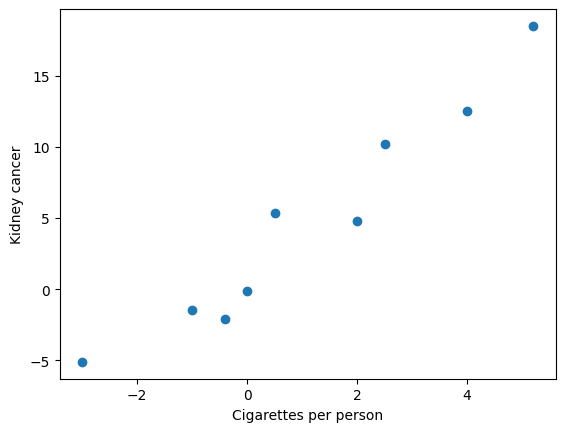

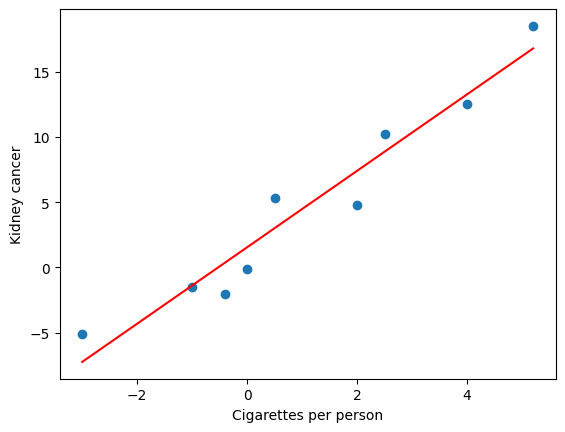

NameError: name 'sigma2' is not defined

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
# Number of data points
n = 9

# Given data
x = np.array([-3, -1, -0.4, 0, 0.5, 2, 2.5, 4, 5.2])
y = np.array([-5.11, -1.49, -2.07, -0.12, 5.33, 4.81, 10.20, 12.53, 18.51])

# Add column of ones to x for intercept term
x = np.column_stack((np.ones(n), x))

# Calculate the least squares estimators
B = np.linalg.lstsq(x, y, rcond=None)[0]
#a 1)
print("Least squares estimators, aka equation", B)

# a 2) Plot the scatter diagram
plt.scatter(x[:, 1], y)
plt.xlabel('Cigarettes per person')
plt.ylabel('Kidney cancer')
plt.show()

# b) Plot the regression line
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], B[0] + B[1] * x[:, 1], 'r-')
plt.xlabel('Cigarettes per person')
plt.ylabel('Kidney cancer')
plt.show()
y_predicted = B[0] + B[1] * x[:, 1]



# c) Calculate the p-value
meanx = np.mean(x[:, 1])
Sxx = np.sum((x[:, 1] - meanx) ** 2)
SSR = (n - 2) * sigma2 * Sxx
TS = B[1] / np.sqrt(SSR / ((n - 2) * Sxx))
pvalue = 2 * (1 - t.cdf(np.abs(TS), n - 2))
print("p-value:", pvalue)

# d) Calculate the confidence interval
x0 = 3400
Delta = np.sqrt(1/n + (x0 - meanx)**2 / Sxx) * np.sqrt(SSR / (n - 2)) * t.ppf(0.95, n - 2)
C_low = B[0] + B[1] * x0 - Delta
C_up = B[0] + B[1] * x0 + Delta
print("90% confidence interval:", C_low, C_up)